In [ ]:
!pip install spacy
!pip install scikit-learn
!pip install pandas
!pip install matplotlib

Saving custom_movies.csv to custom_movies (8).csv
                                                Plot            Genre
0  KGF - A man rises from poverty to become a fea...  Action Thriller
1  96 - A photographer reminisces about his high ...          Romance
2  Iru mugan - An agent investigates a mysterious...          Fantasy
3  Enthiran - A scientist creates a humanoid robo...           Sci-Fi
4  Pizza - A pizza delivery boy encounters parano...           Horror
Class distribution:
 Genre
Action Thriller    2
Sci-Fi             2
Romance            1
Fantasy            1
Horror             1
Historical         1
Thriller           1
Adventure          1
Mystery            1
Name: count, dtype: int64


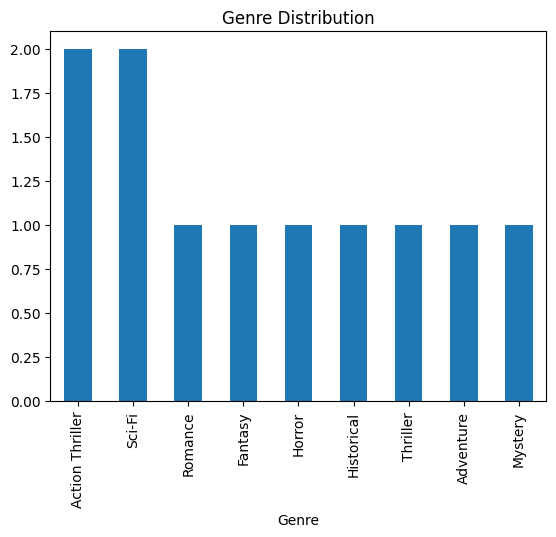

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Predicted Genre for the new plot: Sci-Fi


<ipython-input-43-64b86e82eb8e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Encoded_Genre'] = le.fit_transform(filtered_data['Genre'])


In [ ]:
# Import necessary libraries
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the spaCy model for tokenization
nlp = spacy.load('en_core_web_sm')

# Load the dataset (Assuming you have uploaded 'custom_movies.csv')
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('custom_movies.csv')

# Check the first few rows of the dataset
print(data.head())

# Preprocess text using spaCy (tokenization, removing stopwords, etc.)
def preprocess_text(text):
    doc = nlp(text.lower())  # Lowercase and parse text using spaCy
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]
    return ' '.join(tokens)

# Apply preprocessing to the 'Plot' column
data['Processed_Plot'] = data['Plot'].apply(preprocess_text)

# Analyze class distribution (Genre)
class_counts = data['Genre'].value_counts()
print("Class distribution:\n", class_counts)

# Visualize the class distribution
class_counts.plot(kind='bar', title='Genre Distribution')
plt.show()

# Filter out genres with less than 2 samples (to avoid errors in model)
class_counts_filtered = class_counts[class_counts >= 2]
filtered_data = data[data['Genre'].isin(class_counts_filtered.index)]

# Encode the target variable 'Genre'
le = LabelEncoder()
filtered_data['Encoded_Genre'] = le.fit_transform(filtered_data['Genre'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(filtered_data['Processed_Plot'], filtered_data['Encoded_Genre'], test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=500, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Test the model with a new plot
new_plot = "A robot is brought back to life to fight a new enemy threatening humanity."
processed_plot = preprocess_text(new_plot)
vectorized_plot = tfidf.transform([processed_plot])
predicted_genre = model.predict(vectorized_plot)
predicted_genre_label = le.inverse_transform(predicted_genre)
print("Predicted Genre for the new plot:", predicted_genre_label[0])
